# **Parkisons Disease Detection using Machine Learning**


## **1. Data Collection**

**Dataset Used** : Parkinsons Disease Dataset<br>
**Dataset Source** : UCI Machine Learning Repository<br>
**Dataset Hosting URL**: https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring

In [2]:
import pandas as pd

In [4]:
url = "parkinsons_updrs.data"
df = pd.read_csv(url)

# Display first 5 rows
print(df.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [8]:
# dataset information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float6

## 2. Data Preprocessing

##**2.1 Handling Missing Values**

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...

##**2.2 Encoding Categorical Variables**

In [9]:
# Convert 'sex' column to categorical type
df['sex'] = df['sex'].astype(int)

##**2.3 Feature Scaling & Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Select features to scale (excluding 'subject#' and target variables)
features = df.drop(columns=['subject#', 'motor_UPDRS', 'total_UPDRS'])

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the feature set
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add target variables back
df_scaled['motor_UPDRS'] = df['motor_UPDRS']
df_scaled['total_UPDRS'] = df['total_UPDRS']

print(df_scaled.head())

        age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0  0.734694  0.0   0.045076   0.058390     0.071164    0.064324     0.039635   
1  0.734694  0.0   0.077034   0.021884     0.032819    0.017305     0.015478   
2  0.734694  0.0   0.108957   0.040137     0.050458    0.030065     0.023868   
3  0.734694  0.0   0.136105   0.044877     0.054856    0.027618     0.031969   
4  0.734694  0.0   0.172487   0.025413     0.040353    0.010488     0.012585   

   Jitter:DDP   Shimmer  Shimmer(dB)  ...  Shimmer:APQ5  Shimmer:APQ11  \
0    0.064433  0.085062     0.098030  ...      0.067543       0.051764   
1    0.017303  0.064691     0.073522  ...      0.053186       0.052753   
2    0.030178  0.051549     0.074483  ...      0.039375       0.044291   
3    0.027673  0.075423     0.144642  ...      0.064878       0.062791   
4    0.010486  0.052604     0.072081  ...      0.044524       0.057515   

   Shimmer:DDA       NHR       HNR      RPDE       DFA       PPE  motor_UP

#**3. Feature Selection**

##**3.1 Correlation Analysis**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

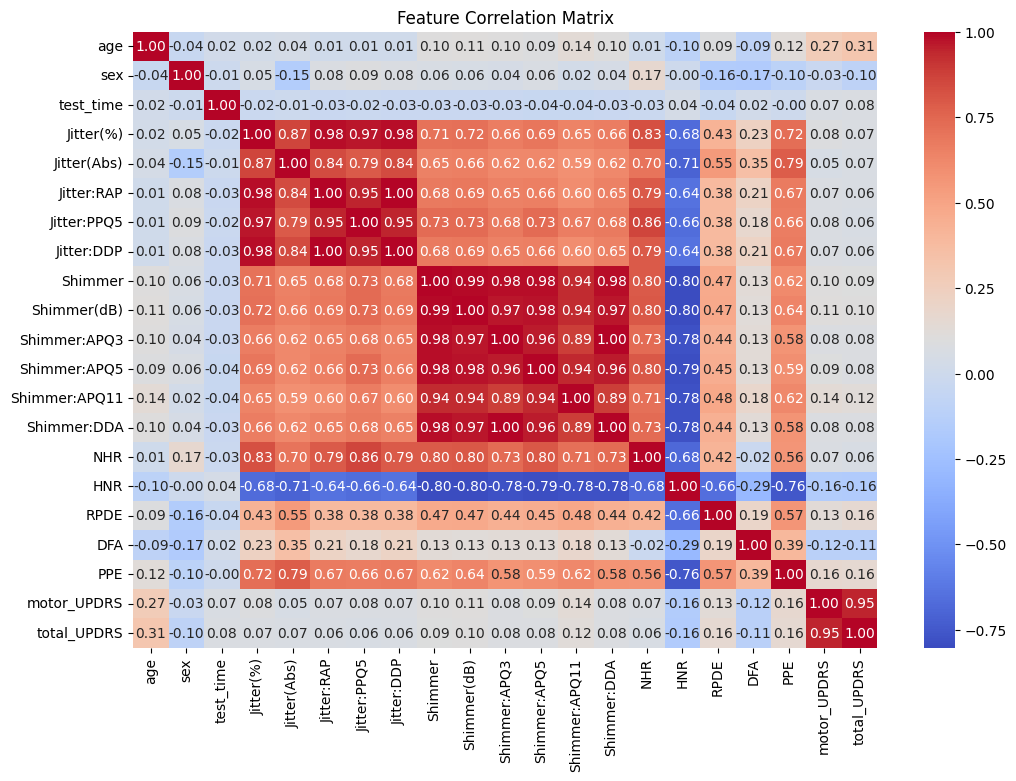

In [14]:
# Compute correlation matrix
correlation_matrix = df_scaled.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [15]:
# Find correlations with target variables
target_correlation = correlation_matrix[["motor_UPDRS", "total_UPDRS"]]

# Select features with absolute correlation > 0.5
important_features = target_correlation[abs(target_correlation) > 0.5].dropna()

# Print selected features
print("Selected Features Based on Correlation:\n", important_features)

Selected Features Based on Correlation:
              motor_UPDRS  total_UPDRS
motor_UPDRS     1.000000     0.947231
total_UPDRS     0.947231     1.000000


##**3.2 Feature Selection with PCA**

Explained variance by components: [0.46609993 0.66360315 0.78924237 0.87441659 0.93684916 0.96195845]


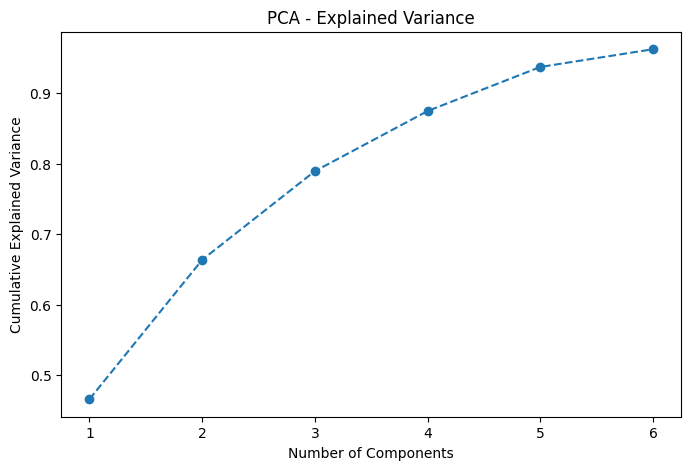

In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Drop target variables before applying PCA
X = df_scaled.drop(columns=['motor_UPDRS', 'total_UPDRS'])

# Apply PCA (keep 95% of variance)
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(X)

# Print explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Explained variance by components:", explained_variance)

# Plot variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()

In [23]:
# Keep only highly correlated features
selected_features = important_features.index.tolist()

# Create final dataset
df_selected = df_scaled[selected_features + ["motor_UPDRS", "total_UPDRS"]]
print(df_selected.head())


   motor_UPDRS  total_UPDRS  motor_UPDRS  total_UPDRS
0       28.199       34.398       28.199       34.398
1       28.447       34.894       28.447       34.894
2       28.695       35.389       28.695       35.389
3       28.905       35.810       28.905       35.810
4       29.187       36.375       29.187       36.375


# **4. Model Building**

##**4.1 Load & Preprocess the Dataset**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [27]:
# Load dataset
df = pd.read_csv("parkinsons_updrs.data")

# Define features (X) and target variable (y)
selected_features = ["RPDE", "DFA", "HNR", "Shimmer:APQ5", "PPE"]  # Based on feature selection
X = df[selected_features]
y = df["total_UPDRS"].apply(lambda x: 1 if x > df["total_UPDRS"].median() else 0)  # Convert to binary classification

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##**4.2 Training Multiple Models**

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6289361702127659


In [29]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.6842553191489362


In [30]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.5531914893617021


In [31]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.5438297872340425


In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.6740425531914893


In [33]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.556595744680851


In [34]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6629787234042553


##**4.3 Comparing different Model Performance**

                 Model  Accuracy
1        Random Forest  0.684255
5                  KNN  0.674043
6              XGBoost  0.662979
0        Decision Tree  0.628936
3                  SVM  0.556596
2  Logistic Regression  0.553191
4          Naïve Bayes  0.543830


<ipython-input-35-69b67951d269>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


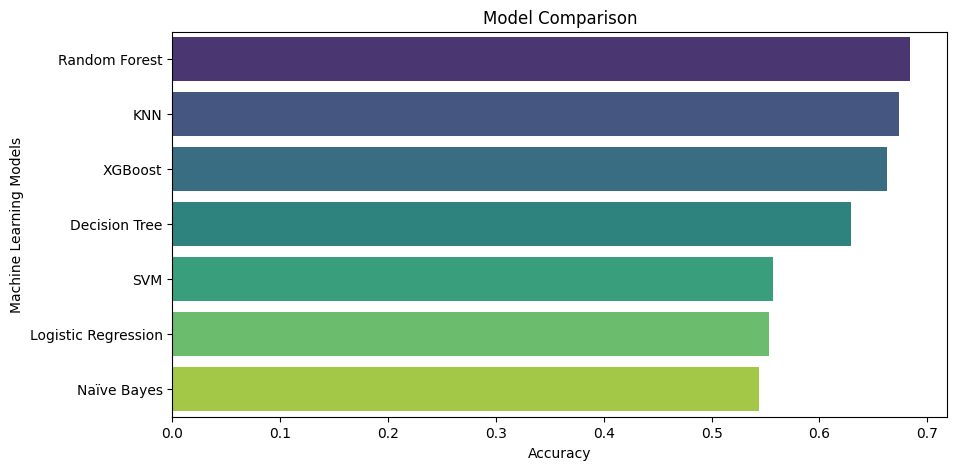

In [35]:
# Store results
models = ["Decision Tree", "Random Forest", "Logistic Regression", "SVM", "Naïve Bayes", "KNN", "XGBoost"]
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_xgb),
]

# Create DataFrame
results_df = pd.DataFrame({"Model": models, "Accuracy": accuracies})
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display results
print(results_df)

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Machine Learning Models")
plt.show()


In [36]:
best_model_name = results_df.iloc[0]["Model"]
print(f"Best performing model: {best_model_name}")

Best performing model: Random Forest


# **5. Optimizing the best performing model using GridSearchCV for hyperparameter tuning**

In [37]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"]
    },
    "Naïve Bayes": {},  # No hyperparameters to tune
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    }
}


In [38]:
# Select the best model
if best_model_name == "Decision Tree":
    model = DecisionTreeClassifier(random_state=42)
elif best_model_name == "Random Forest":
    model = RandomForestClassifier(random_state=42)
elif best_model_name == "Logistic Regression":
    model = LogisticRegression()
elif best_model_name == "SVM":
    model = SVC()
elif best_model_name == "KNN":
    model = KNeighborsClassifier()
elif best_model_name == "XGBoost":
    model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
else:
    raise ValueError("Invalid model name!")

# Get hyperparameters for GridSearch
param_grid = param_grids[best_model_name]

# Run GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print(f"Best hyperparameters for {best_model_name}: {grid_search.best_params_}")

# Train best model with optimized hyperparameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate optimized model
print("\nOptimized Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Optimized Model Performance:
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68       601
           1       0.66      0.71      0.68       574

    accuracy                           0.68      1175
   macro avg       0.68      0.68      0.68      1175
weighted avg       0.68      0.68      0.68      1175



In [39]:
# Compare accuracy before and after tuning
before_accuracy = results_df[results_df["Model"] == best_model_name]["Accuracy"].values[0]
after_accuracy = accuracy_score(y_test, y_pred_best)

print(f"🔹 {best_model_name} Accuracy Before Tuning: {before_accuracy:.4f}")
print(f"🔹 {best_model_name} Accuracy After Tuning: {after_accuracy:.4f}")


🔹 Random Forest Accuracy Before Tuning: 0.6843
🔹 Random Forest Accuracy After Tuning: 0.6800
